### Load required libraries

In [10]:
import csv
import pandas as pd
import numpy as np
from datetime import timedelta, date
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Data Preprocessing

In [11]:
#loading data
df = pd.read_csv('sample-subscription.csv')
report_start_date = date(2015,1,1)
report_end_date = date(2015,12,1)

# Data preprocessing 
df.fillna(report_end_date, inplace=True)
df['subscription_start_date'] =pd.to_datetime(df['subscription_start_date'], format = '%Y-%m-%d')
df['subscription_end_date'] =pd.to_datetime(df['subscription_end_date'], format = '%Y-%m-%d')

### Calculate tmrc for each day


In [12]:
# Helper function 
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

# calculate tmrc for every day         
daily_mrr=[]
for my_date in daterange(report_start_date, report_end_date):
    my_date_df = df[(df['subscription_end_date']>=my_date ) 
                    & (df['subscription_start_date']<= my_date) 
                    & (df['subscription_start_date'].apply(lambda x: x.day) == my_date.day)]
    tmrc = my_date_df['dmrc'].sum()
    daily_mrr.append({'date':my_date,'mrc':tmrc})

### Visulization
Figure bellow shows dailly MRR

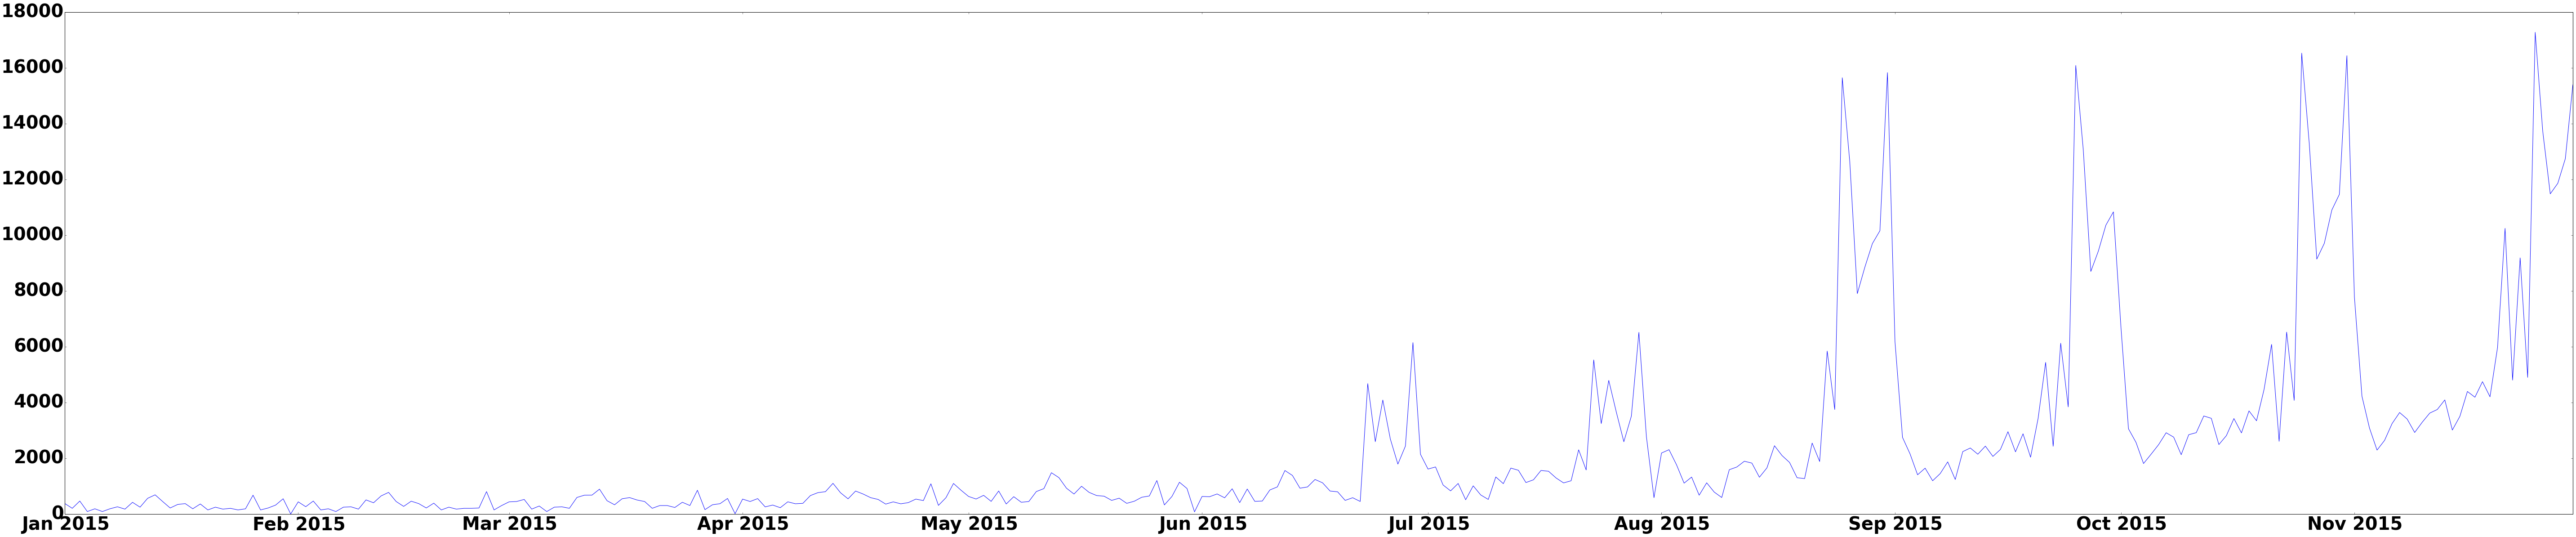

In [13]:
dates = matplotlib.dates.date2num([x['date'] for x in daily_mrr])
y = [x['mrc'] for x in daily_mrr]
plt.figure(figsize=(100,20))
plt.plot_date(dates, y,'-')
plt.rc('font',**{'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40})
plt.show()

### Generate Reports
since we have our daily MRR data we can group it by Monthly or Weekly

#### Monthly MRR

In [14]:
df = pd.DataFrame(daily_mrr)
df = df.set_index(pd.DatetimeIndex(df['date']))
# group by dataframe Monthly
g_df= df.groupby(pd.TimeGrouper("m"))
res = g_df.sum()
res.sort_index()
res['date']=res.index.to_datetime()

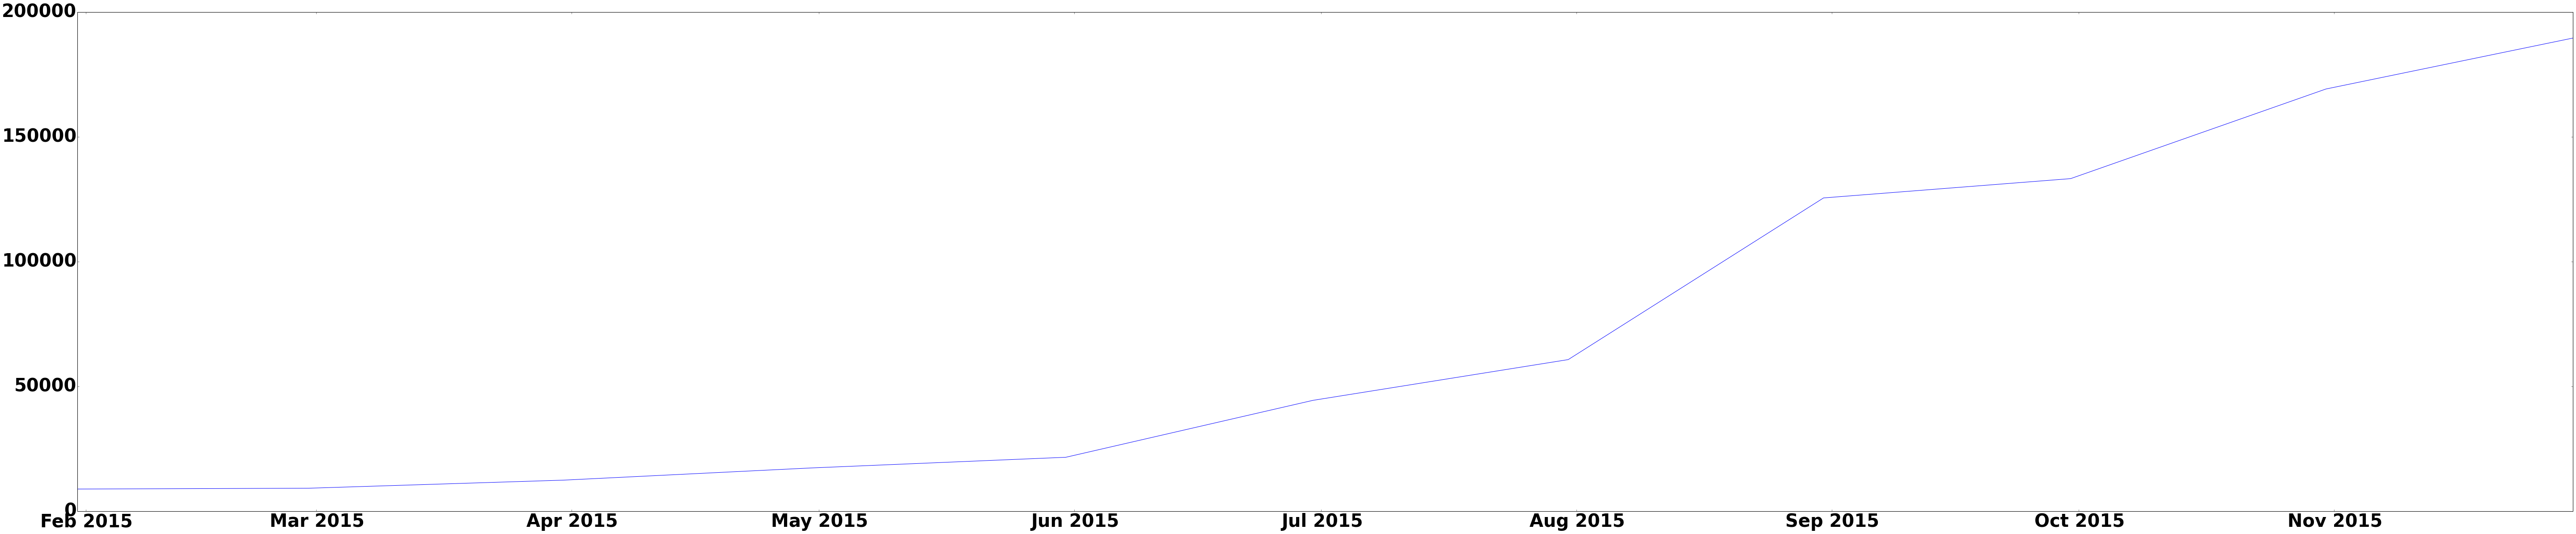

In [15]:
dates = matplotlib.dates.date2num(res.index.to_pydatetime())
y = res['mrc']
plt.figure(figsize=(100,20))
plt.plot_date(dates, y,'-')
plt.rc('font',**{'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40})
plt.show()

#### Rolling MRR
As mentioned erlier rolling MRR for each day is some of daily mrr of past 30 days

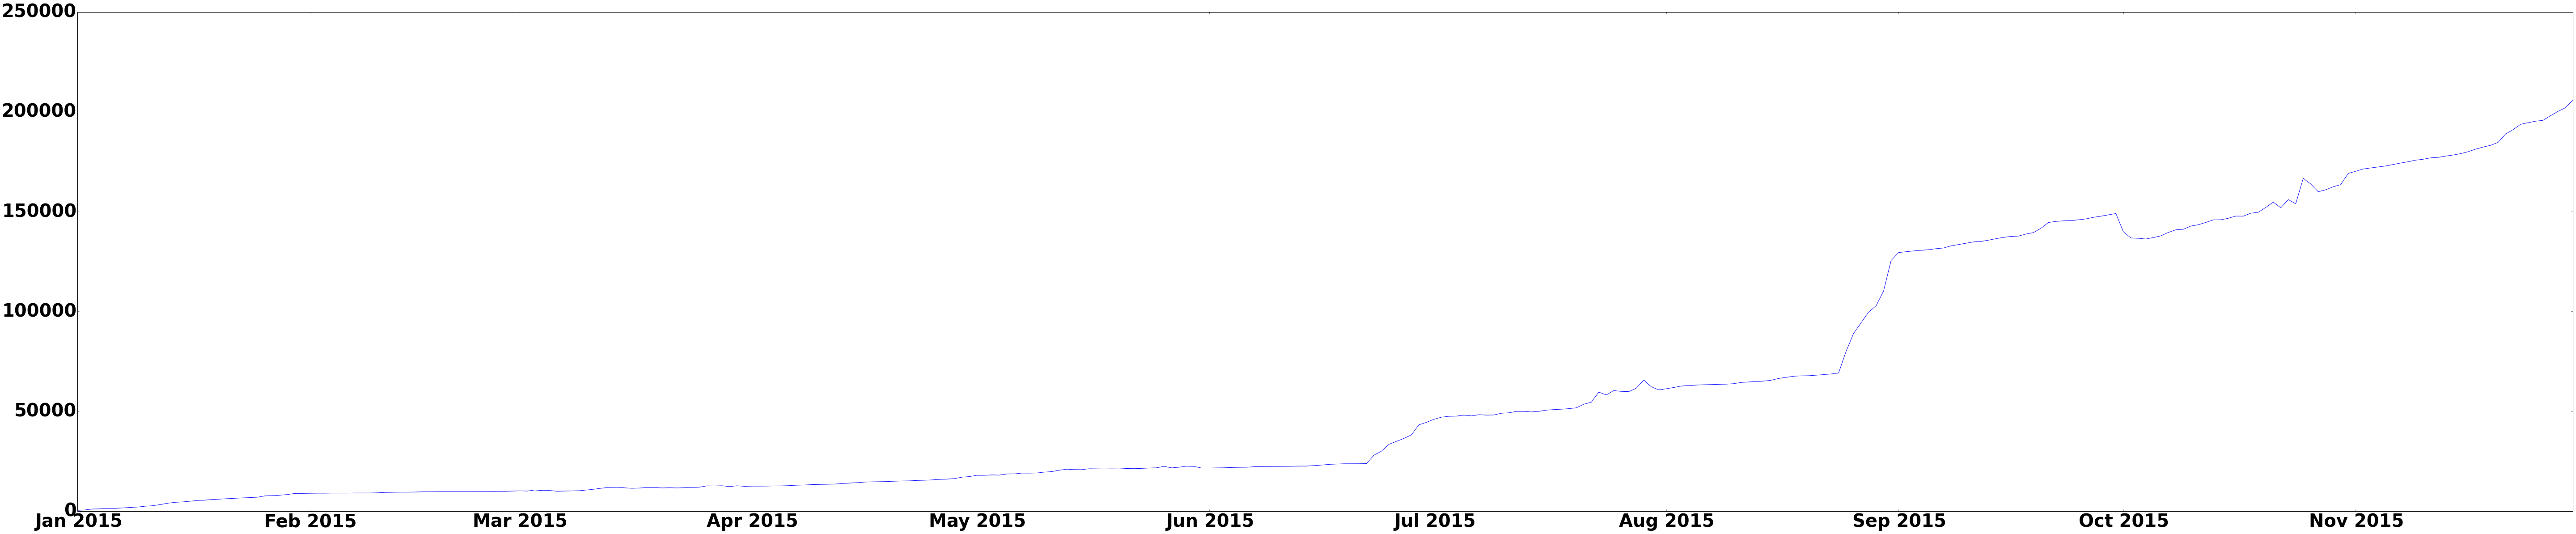

In [16]:
rolling_mrr = [{
            'date': x['date'], 
            'mrc': x['mrc'] + sum([z['mrc'] for z in daily_mrr
                                   [0 if daily_mrr.index(x) < 30 
                                    else 
                                    daily_mrr.index(x) - 30:daily_mrr.index(x)]])} for x in daily_mrr]

dates = matplotlib.dates.date2num([x['date'] for x in rolling_mrr])
y = [x['mrc'] for x in rolling_mrr]
plt.figure(figsize=(100,20))
plt.plot_date(dates, y,'-')
plt.rc('font',**{'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40})
plt.show()